# Курсовая работа. Блок ML Beginner
<br>

**NB!** Код должен быть с комментариями к каждому логическому блоку кода. В противном случае работа **не** будет принята. <br><br>
Выполнение курсовой работы может потребовать использование дополнительных библиотек. Может потребоваться предварительная обработка данных.

<br><br>
**Описание работы:**
&nbsp;&nbsp;&nbsp;&nbsp;
<br><br>
&nbsp;&nbsp;&nbsp;&nbsp; Любой бизнес хочет максимизировать количество клиентов. Для достижения этой цели важно не только пытаться привлечь новых, но и удерживать уже существующих. Удержать клиента обойдется компании дешевле, чем привлечь нового. Кроме того, новый клиент может оказаться слабо заинтересованным в услугах бизнеса и с ним будет сложно работать, тогда как о старых клиентах уже есть необходимые данные по взаимодействию с сервисом. 
 <br>

&nbsp;&nbsp;&nbsp;&nbsp; Соответственно, прогнозируя отток, мы можем вовремя среагировать и попытаться удержать клиента, который хочет уйти. Опираясь на данные об услугах, которыми пользуется клиент, мы можем сделать ему специальное предложение, пытаясь изменить его решение об уходе от оператора. Благодаря этому задача удержания будет легче в реализации, чем задача привлечения новых пользователей, о которых мы еще ничего не знаем.<br>

&nbsp;&nbsp;&nbsp;&nbsp; Вам предоставлен набор данных от телекоммуникационной компании. В данных содержится информация о почти шести тысячах пользователей, их демографических характеристиках, услугах, которыми они пользуются, длительности пользования услугами оператора, методе оплаты, размере оплаты. 
<br>

&nbsp;&nbsp;&nbsp;&nbsp; Cтоит задача проанализировать данные и спрогнозировать отток пользователей (выявить людей, которые продлят контракт и которые не продлят). Работа должна включать в себя следующие обязательные пункты: 
1. Описание данных *(с расчетом базовых статистик)*, 
2. Исследование зависимостей и формулирование гипотез, 
3. Построение моделей для прогнозирования оттока *(с обоснованием выбора той или иной модели)* на основе проверенных гипотез и выявленных взаимосвязей, 
4. Сравнение качества полученных моделей. 

Во втором разделе обязательно должно присутствовать обоснование гипотез, подробное описание выявленных взаимосвязей, а также их визуализация. 
<br>В четвертом дополнительно должны быть сформулированы общие выводы работы.

<br><br>

_________

[Codebook](#Codebook) <br>
[1. Описание данных](#1.-Описание-данных)<br>
[2. Исследование зависимостей и формулирование гипотез](#2.-Исследование-зависимостей-и-формулирование-гипотез)<br>
[3. Построение моделей для прогнозирования оттока](#3.-Построение-моделей-для-прогнозирования-оттока)<br>
[4. Сравнение качества моделей](#4.-Сравнение-качества-моделей) <br>


## Codebook
<br>

[Ссылка для скачивания данных](https://drive.google.com/open?id=1dPCG76ST6NohYKtVMGv6HpFL-jD5p1eJ) 
<br><br>

`telecom_users.csv` содержит следующие значения:<br><br>

&nbsp;&nbsp;&nbsp;&nbsp; `customerID` – id клиента<br>
&nbsp;&nbsp;&nbsp;&nbsp; `gender` – пол клиента (male/female)<br>
&nbsp;&nbsp;&nbsp;&nbsp; `SeniorCitizen` – яляется ли клиент пенсионером (1, 0)<br>
&nbsp;&nbsp;&nbsp;&nbsp; `Partner` – состоит ли клиент в браке (Yes, No)<br>
&nbsp;&nbsp;&nbsp;&nbsp; `Dependents` – есть ли у клиента иждивенцы (Yes, No)<br>
&nbsp;&nbsp;&nbsp;&nbsp; `tenure` – сколько месяцев человек являлся клиентом компании<br>
&nbsp;&nbsp;&nbsp;&nbsp; `PhoneService` – подключена ли услуга телефонной связи (Yes, No)<br>
&nbsp;&nbsp;&nbsp;&nbsp; `MultipleLines` – подключены ли несколько телефонных линий (Yes, No, No phone service)<br>
&nbsp;&nbsp;&nbsp;&nbsp; `InternetService` – интернет-провайдер клиента (DSL, Fiber optic, No)<br>
&nbsp;&nbsp;&nbsp;&nbsp; `OnlineSecurity` – подключена ли услуга онлайн-безопасности (Yes, No, No internet service)<br>
&nbsp;&nbsp;&nbsp;&nbsp; `OnlineBackup` – подключена ли услуга online backup (Yes, No, No internet service)<br>
&nbsp;&nbsp;&nbsp;&nbsp; `DeviceProtection` – есть ли у клиента страховка оборудования (Yes, No, No internet service)<br>
&nbsp;&nbsp;&nbsp;&nbsp; `TechSupport` – подключена ли услуга технической поддержки (Yes, No, No internet service)<br>
&nbsp;&nbsp;&nbsp;&nbsp; `StreamingTV` – подключена ли услуга стримингового телевидения (Yes, No, No internet service)<br>
&nbsp;&nbsp;&nbsp;&nbsp; `StreamingMovies` – подключена ли услуга стримингового кинотеатра (Yes, No, No internet service)<br>
&nbsp;&nbsp;&nbsp;&nbsp; `Contract` – тип контракта клиента (Month-to-month, One year, Two year)<br>
&nbsp;&nbsp;&nbsp;&nbsp; `PaperlessBilling` – пользуется ли клиент безбумажным биллингом (Yes, No)<br>
&nbsp;&nbsp;&nbsp;&nbsp; `PaymentMethod` – метод оплаты (Electronic check, Mailed check, Bank transfer (automatic), Credit card (automatic))<br>
&nbsp;&nbsp;&nbsp;&nbsp; `MonthlyCharges` – месячный размер оплаты на настоящий момент<br>
&nbsp;&nbsp;&nbsp;&nbsp; `TotalCharges` – общая сумма, которую клиент заплатил за услуги за все время<br>
&nbsp;&nbsp;&nbsp;&nbsp; `Churn` – произошел ли отток (Yes or No)<br>

# 1. Описание данных

In [1]:
import pandas as pd
import numpy as np
import pickle

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score

import lightgbm as lgb
import catboost as cb

from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import VotingClassifier

from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MaxAbsScaler 
from sklearn.preprocessing import MinMaxScaler

from sklearn.pipeline import make_pipeline
from sklearn.compose import ColumnTransformer

In [2]:
telecom_users = pd.read_csv('telecom_users.csv')
telecom_users

,Unnamed: 0,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,1869,7010-BRBUU,Male,0,Yes,Yes,72,Yes,Yes,No,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Credit card (automatic),24.10,1734.65,No
1,4528,9688-YGXVR,Female,0,No,No,44,Yes,No,Fiber optic,...,Yes,No,Yes,No,Month-to-month,Yes,Credit card (automatic),88.15,3973.2,No
2,6344,9286-DOJGF,Female,1,Yes,No,38,Yes,Yes,Fiber optic,...,No,No,No,No,Month-to-month,Yes,Bank transfer (automatic),74.95,2869.85,Yes
3,6739,6994-KERXL,Male,0,No,No,4,Yes,No,DSL,...,No,No,No,Yes,Month-to-month,Yes,Electronic check,55.90,238.5,No
4,432,2181-UAESM,Male,0,No,No,2,Yes,No,DSL,...,Yes,No,No,No,Month-to-month,No,Electronic check,53.45,119.5,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5981,3772,0684-AOSIH,Male,0,Yes,No,1,Yes,No,Fiber optic,...,No,No,Yes,Yes,Month-to-month,Yes,Electronic check,95.00,95,Yes
5982,5191,5982-PSMKW,Female,0,Yes,Yes,23,Yes,Yes,DSL,...,Yes,Yes,Yes,Yes,Two year,Yes,Credit card (automatic),91.10,2198.3,No
5983,5226,8044-BGWPI,Male,0,Yes,Yes,12,Yes,No,No,...,No internet service,No internet service,No internet service,No internet service,Month-to-month,Yes,Electronic check,21.15,306.05,No
5984,5390,7450-NWRTR,Male,1,No,No,12,Yes,Yes,Fiber optic,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.45,1200.15,Yes


In [3]:
telecom_users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5986 entries, 0 to 5985
Data columns (total 22 columns):
Unnamed: 0          5986 non-null int64
customerID          5986 non-null object
gender              5986 non-null object
SeniorCitizen       5986 non-null int64
Partner             5986 non-null object
Dependents          5986 non-null object
tenure              5986 non-null int64
PhoneService        5986 non-null object
MultipleLines       5986 non-null object
InternetService     5986 non-null object
OnlineSecurity      5986 non-null object
OnlineBackup        5986 non-null object
DeviceProtection    5986 non-null object
TechSupport         5986 non-null object
StreamingTV         5986 non-null object
StreamingMovies     5986 non-null object
Contract            5986 non-null object
PaperlessBilling    5986 non-null object
PaymentMethod       5986 non-null object
MonthlyCharges      5986 non-null float64
TotalCharges        5986 non-null object
Churn               5986 non-null 

In [4]:
# Проверим, не присутствуют ли пропущенные значения
telecom_users.isnull().values.any()

False

In [5]:
# Меняем тип столбца на числовой, помечая пропущенные значения как "-1"
telecom_users['TotalCharges'][telecom_users['TotalCharges']==' ']=-1
telecom_users['TotalCharges'] = telecom_users['TotalCharges'].astype(np.float)

C:\Users\HP\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [6]:
# Переименовываю столбец, для удобства дальнейшей работы с ним
telecom_users.rename(columns={'Unnamed: 0': 'id'}, inplace=True) # = 'id'

In [7]:
telecom_users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5986 entries, 0 to 5985
Data columns (total 22 columns):
id                  5986 non-null int64
customerID          5986 non-null object
gender              5986 non-null object
SeniorCitizen       5986 non-null int64
Partner             5986 non-null object
Dependents          5986 non-null object
tenure              5986 non-null int64
PhoneService        5986 non-null object
MultipleLines       5986 non-null object
InternetService     5986 non-null object
OnlineSecurity      5986 non-null object
OnlineBackup        5986 non-null object
DeviceProtection    5986 non-null object
TechSupport         5986 non-null object
StreamingTV         5986 non-null object
StreamingMovies     5986 non-null object
Contract            5986 non-null object
PaperlessBilling    5986 non-null object
PaymentMethod       5986 non-null object
MonthlyCharges      5986 non-null float64
TotalCharges        5986 non-null float64
Churn               5986 non-null

In [8]:
telecom_users

,id,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,1869,7010-BRBUU,Male,0,Yes,Yes,72,Yes,Yes,No,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Credit card (automatic),24.10,1734.65,No
1,4528,9688-YGXVR,Female,0,No,No,44,Yes,No,Fiber optic,...,Yes,No,Yes,No,Month-to-month,Yes,Credit card (automatic),88.15,3973.20,No
2,6344,9286-DOJGF,Female,1,Yes,No,38,Yes,Yes,Fiber optic,...,No,No,No,No,Month-to-month,Yes,Bank transfer (automatic),74.95,2869.85,Yes
3,6739,6994-KERXL,Male,0,No,No,4,Yes,No,DSL,...,No,No,No,Yes,Month-to-month,Yes,Electronic check,55.90,238.50,No
4,432,2181-UAESM,Male,0,No,No,2,Yes,No,DSL,...,Yes,No,No,No,Month-to-month,No,Electronic check,53.45,119.50,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5981,3772,0684-AOSIH,Male,0,Yes,No,1,Yes,No,Fiber optic,...,No,No,Yes,Yes,Month-to-month,Yes,Electronic check,95.00,95.00,Yes
5982,5191,5982-PSMKW,Female,0,Yes,Yes,23,Yes,Yes,DSL,...,Yes,Yes,Yes,Yes,Two year,Yes,Credit card (automatic),91.10,2198.30,No
5983,5226,8044-BGWPI,Male,0,Yes,Yes,12,Yes,No,No,...,No internet service,No internet service,No internet service,No internet service,Month-to-month,Yes,Electronic check,21.15,306.05,No
5984,5390,7450-NWRTR,Male,1,No,No,12,Yes,Yes,Fiber optic,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.45,1200.15,Yes


In [9]:
telecom_users.describe()

,id,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,5986.000000,5986.000000,5986.000000,5986.000000,5986.000000
mean,3533.561310,0.161377,32.468760,64.802213,2294.219888
std,2035.705666,0.367909,24.516391,30.114702,2274.165810
min,0.000000,0.000000,0.000000,18.250000,-1.000000
25%,1777.250000,0.000000,9.000000,35.650000,401.587500
50%,3546.500000,0.000000,29.000000,70.400000,1408.575000
75%,5291.750000,0.000000,56.000000,89.900000,3841.500000
max,7042.000000,1.000000,72.000000,118.750000,8684.800000


Общее количество клиентов: 5986
Общее количество уникальных клиентов: 5986
Среди клиентов 3050 мужчин и 2936 женщин


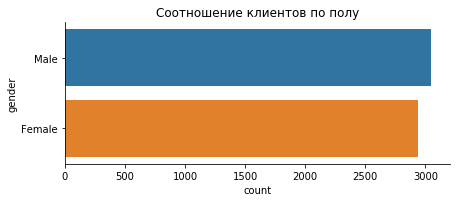

In [10]:
full_client_number = telecom_users.shape[0]
print('Общее количество клиентов:', full_client_number)
print('Общее количество уникальных клиентов:', telecom_users['customerID'].unique().shape[0])

print('Среди клиентов', telecom_users[telecom_users['gender']=='Male'].shape[0], 'мужчин и',
     telecom_users[telecom_users['gender']=='Female'].shape[0], 'женщин')
ax = sns.catplot(y='gender', kind='count', data=telecom_users, height=2.5, aspect=2.5)
ax.set(title='Соотношение клиентов по полу')
plt.show()

In [11]:
num_of_seniors = telecom_users[telecom_users['SeniorCitizen']==1].shape[0]
print('Общая доля пожилых людей: ', 
      round(num_of_seniors/full_client_number*100, 2),
      '%', sep='', )
print('Из них, не продлили контракт: ',
     round(telecom_users[(telecom_users['SeniorCitizen']==1)&(telecom_users['Churn']==1)].shape[0]/num_of_seniors*100, 2),
     '%', sep='',)

Общая доля пожилых людей: 16.14%
Из них, не продлили контракт: 0.0%


Всего клиентов, не продливших договор: 1587, что составляет в процентом выражении: 26.51%


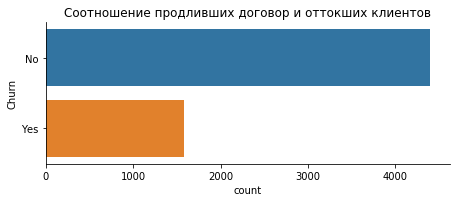

In [12]:
print('Всего клиентов, не продливших договор:',
     f"{telecom_users[telecom_users['Churn']=='Yes'].shape[0]}, что составляет в процентом выражении:",
     f"{telecom_users[telecom_users['Churn']=='Yes'].shape[0]/full_client_number*100:.2f}%")
ax = sns.catplot(y='Churn', kind='count', data=telecom_users, height=2.5, aspect=2.5);
ax.set(title='Соотношение продливших договор и оттокших клиентов');

In [13]:
linear_columns = ['tenure', 'MonthlyCharges', 'TotalCharges', 'id']

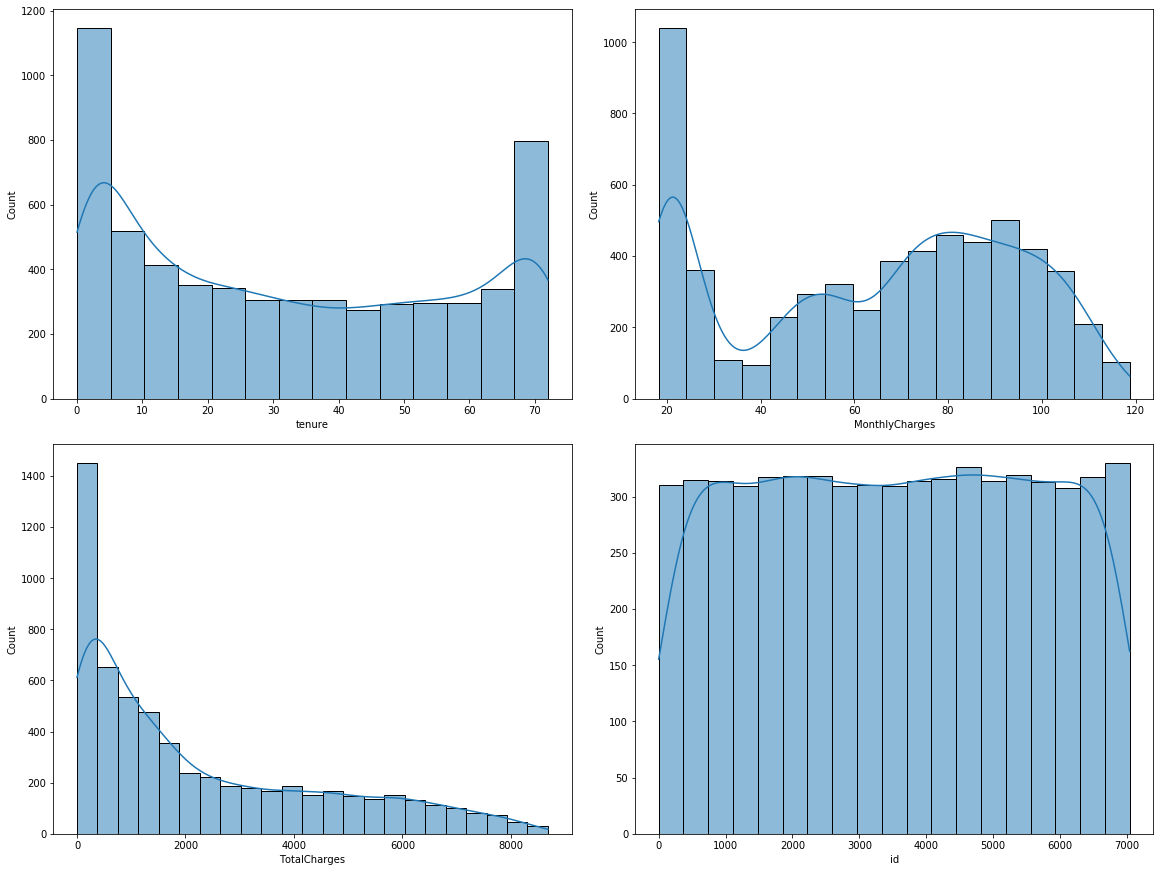

In [14]:
fig, ax = plt.subplots(2, 2, figsize=(16, 12), constrained_layout=True)
for i, column in enumerate(linear_columns):
    sns.histplot(x=telecom_users[column], ax=ax[i//2, i%2], kde=True)

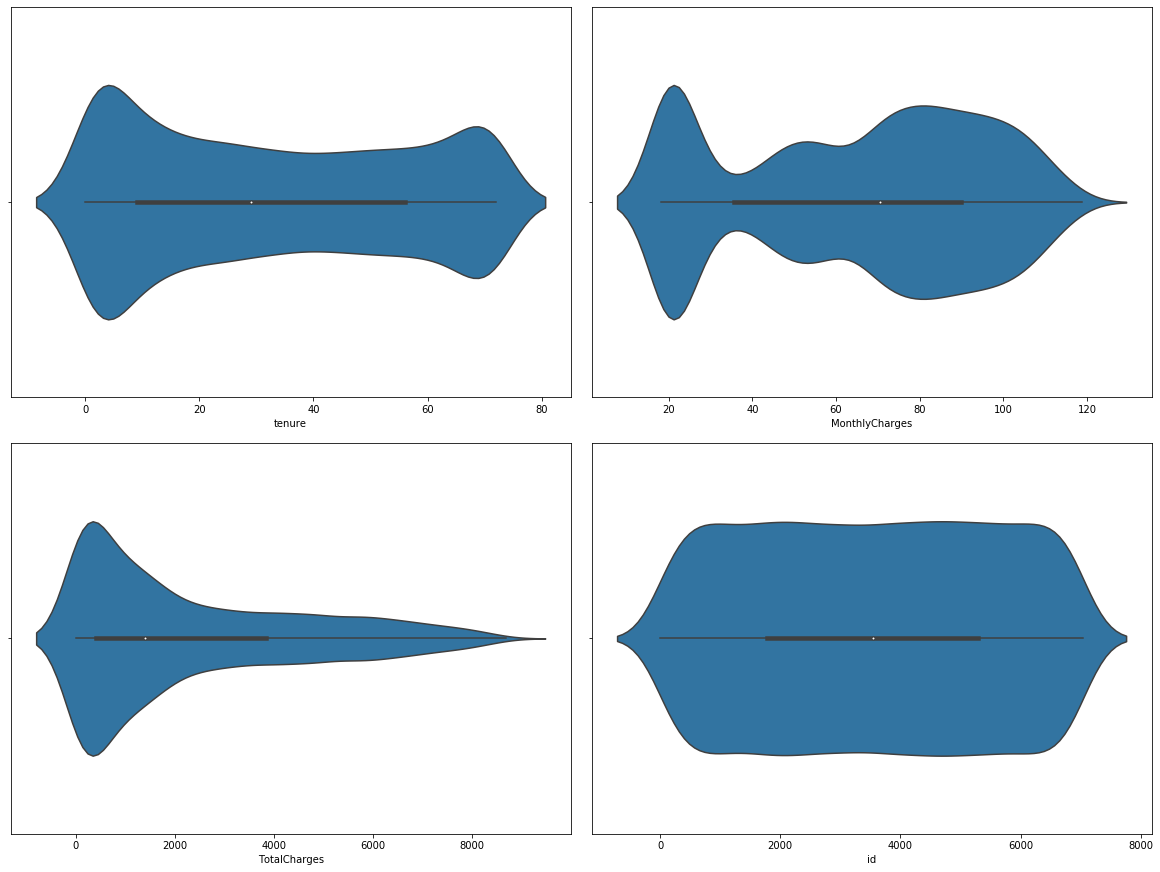

In [16]:
# Проверяем, если выбросы в данных
fig, ax = plt.subplots(2, 2, figsize=(16, 12), constrained_layout=True)
for i, column in enumerate(linear_columns):
    sns.violinplot(data=telecom_users, x=column, ax=ax[i//2, i%2], width=0.6)

Как видно на графиков, явных выбросов не наблюдается

In [17]:
# Построим матрицу корреляций
telecom_users.corr()

,id,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
id,1.000000,-0.000331,0.009620,-0.009830,0.004213
SeniorCitizen,-0.000331,1.000000,0.005468,0.219387,0.093807
tenure,0.009620,0.005468,1.000000,0.256983,0.827756
MonthlyCharges,-0.009830,0.219387,0.256983,1.000000,0.656762
TotalCharges,0.004213,0.093807,0.827756,0.656762,1.000000


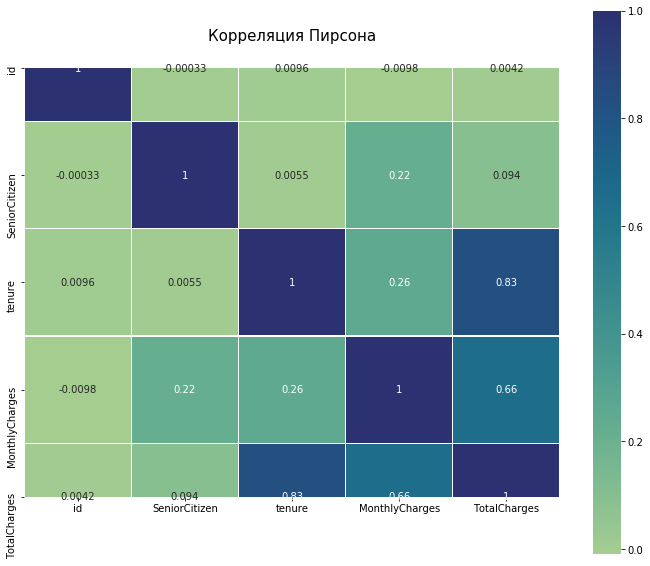

In [19]:
# Визуализируем полученную таблицу
colormap = "crest"
plt.figure(figsize=(12, 10))
plt.title('Корреляция Пирсона', y=1.05, size=15)
sns.heatmap(telecom_users.corr(), annot=True, linewidths=0.1, vmax=1.0, square=True, cmap=colormap, linecolor='white');

По матрице корреляций видно, что есть сильная корелляция межды длительностью договора и суммарной оплатой. Несколько меньшая связь между длительностью договора и ежемесячными платежами.

# 2. Исследование зависимостей и формулирование гипотез

По матрице корреляции не совсем видно, отличаются ли статистические данные по оттокшим/оставшимся клиентам. Здесь нам поможет seaborn. Построим попарные соотношения по фичам, с дополнительным разделением по оттоку

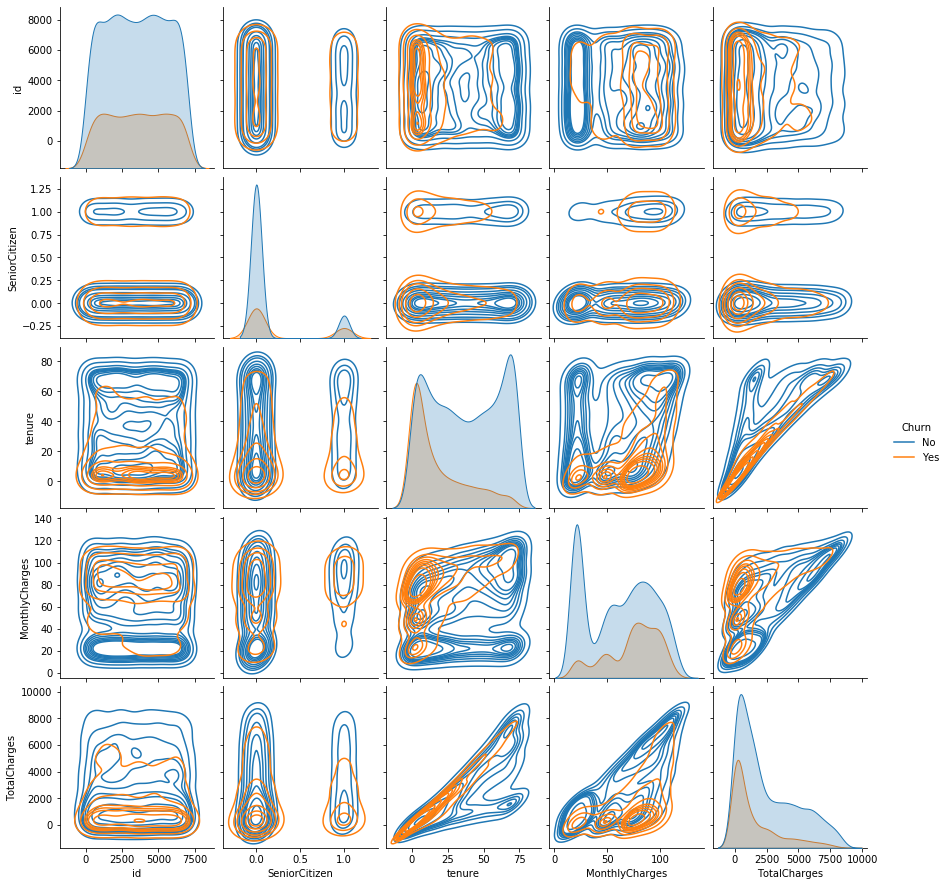

In [20]:
sns.pairplot(telecom_users, hue='Churn', 
             kind='kde', diag_kind='kde', 
             plot_kws={'fill':False},
);

Как видно выше на графике, явно простматривается кластеры ушедших/оставшихся клиентов по разным парам значений.

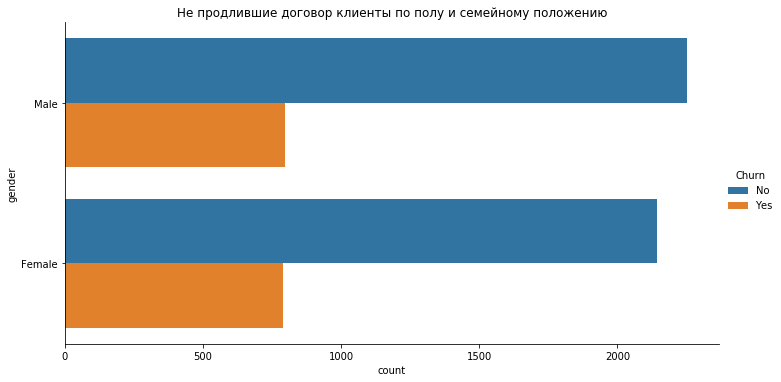

In [21]:
ax = sns.catplot(y='gender', kind='count', hue='Churn', data=telecom_users, aspect=2, height=5)
ax.set(title='Не продлившие договор клиенты по полу и семейному положению');

Семейной положение влияет на отток незначительно

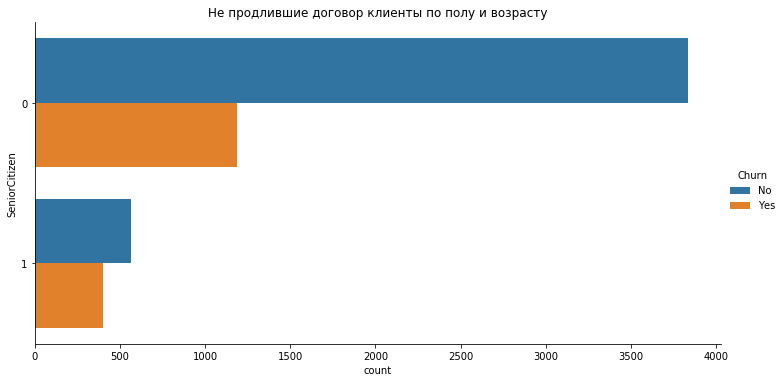

In [22]:
ax = sns.catplot(y='SeniorCitizen', hue='Churn', kind='count', data=telecom_users, aspect=2, height=5)
ax.set(title='Не продлившие договор клиенты по полу и возрасту');

Как можно видеть, на продление договора корреляции с полом практически нет, но явная связь с возрастом

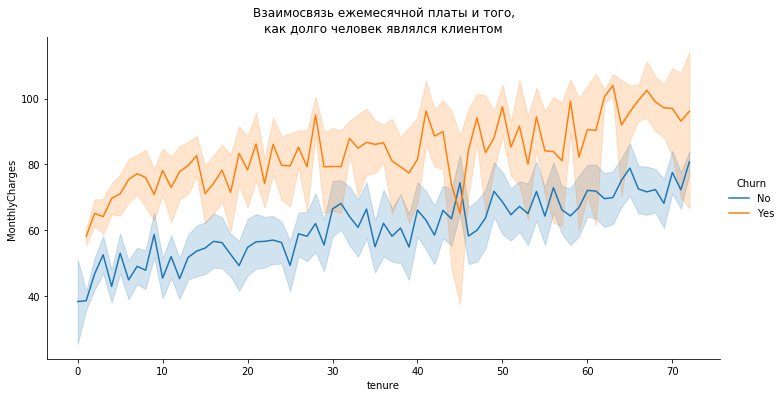

In [23]:
sns.relplot(data=telecom_users, x='tenure', y='MonthlyCharges', hue='Churn', kind='line', aspect=2, height=5)
plt.title('Взаимосвязь ежемесячной платы и того,\nкак долго человек являлся клиентом');

Можно сделать вывод, что оттокшие пользователи, в среднем, больше платили за услуги, что в большей стпени повляли на отток

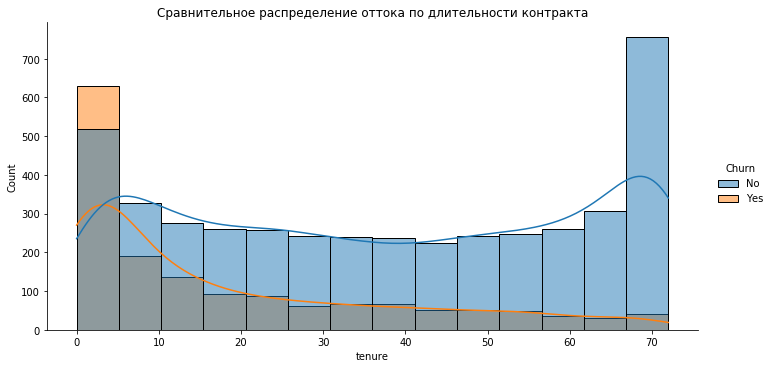

In [24]:
sns.displot(data=telecom_users, x='tenure', hue='Churn', kde=True, height=5, aspect=2)
plt.title('Сравнительное распределение оттока по длительности контракта');

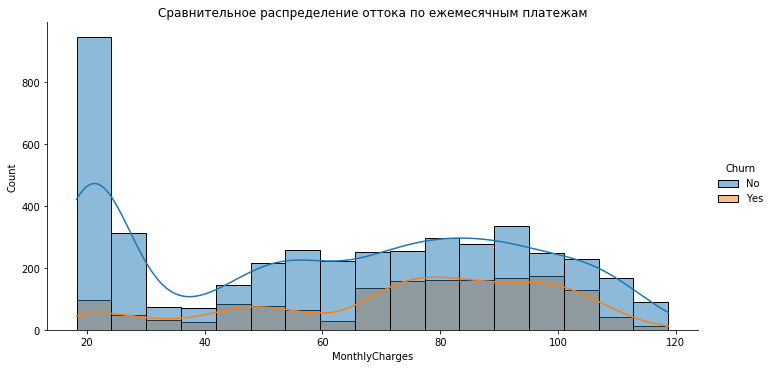

In [25]:
sns.displot(data=telecom_users, x='MonthlyCharges', hue='Churn', kde=True, height=5, aspect=2)
plt.title('Сравнительное распределение оттока по ежемесячным платежам');

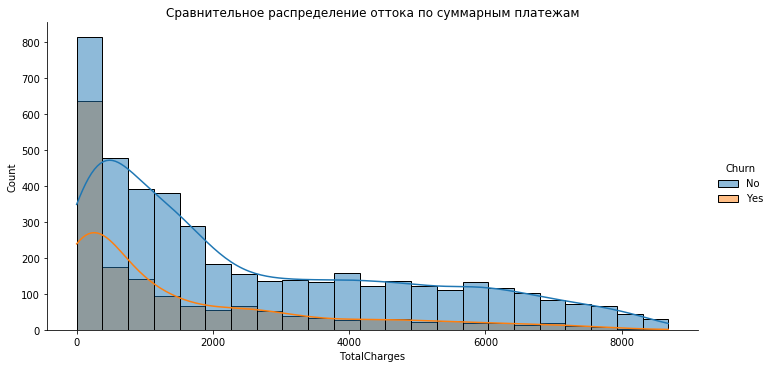

In [26]:
sns.displot(data=telecom_users, x='TotalCharges', hue='Churn', kde=True, height=5, aspect=2)
plt.title('Сравнительное распределение оттока по суммарным платежам');

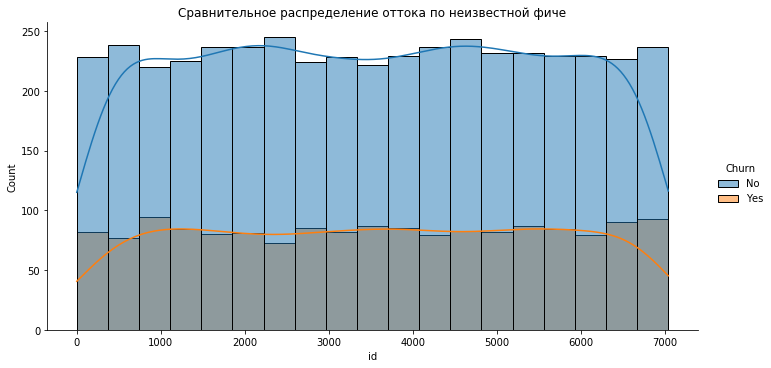

In [28]:
sns.displot(data=telecom_users, x='id', hue='Churn', kde=True, height=5, aspect=2)
plt.title('Сравнительное распределение оттока по неизвестной фиче');

Фича выглядит равномерно распределенной. По данным из других источников это индекс. Дальнейшие эксперименты показали, что ее наличие мало влияет на результаты обучения алгоритмов. Значит,можно ее удалить.

In [29]:
# Удаляю фичу id из датасета
telecom_users.drop(columns=['id'], axis=1, inplace=True)

Распределения ежемесячной платы и оттока от возраста и семейного положения


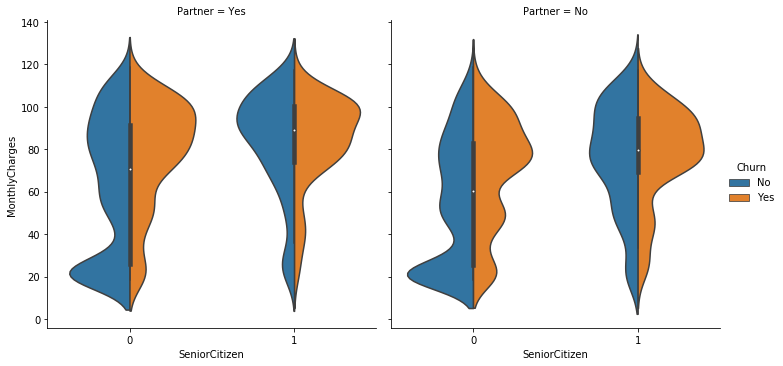

In [30]:
sns.catplot(data=telecom_users, 
            y='MonthlyCharges', x='SeniorCitizen', hue='Churn', col='Partner', 
            kind='violin', split=True, orient='v', height=5, aspect=1, legend_out=True);
print('Распределения ежемесячной платы и оттока от возраста и семейного положения');

По графикам видно, что распределение ежемесячной платы и оттока клиентов у пенсионеров/не пенсионеров существенно отличается, и несколько зависит от того, состоит ли клиент в браке

Распределения ежемесячной платы и оттока от пола и наличия детей


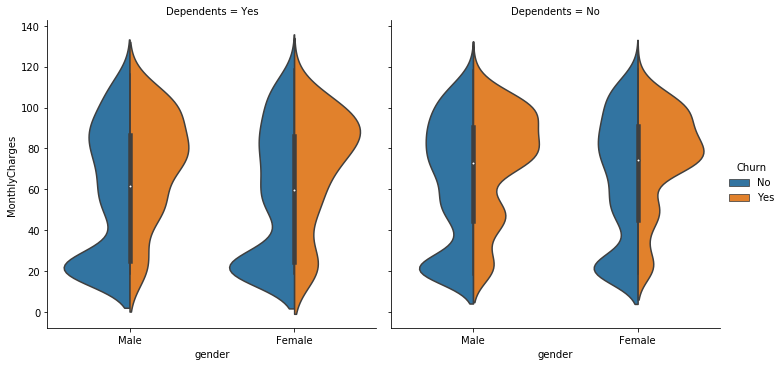

In [31]:
sns.catplot(data=telecom_users, 
            y='MonthlyCharges', x='gender', hue='Churn', col='Dependents', 
            kind='violin', split=True, orient='v', height=5, aspect=1);
print('Распределения ежемесячной платы и оттока от пола и наличия детей');

По графикам видно, что ушедшие клиенты платят, в среднем, больше. И отток от пола/наличия иждивенцев зависит слабо.

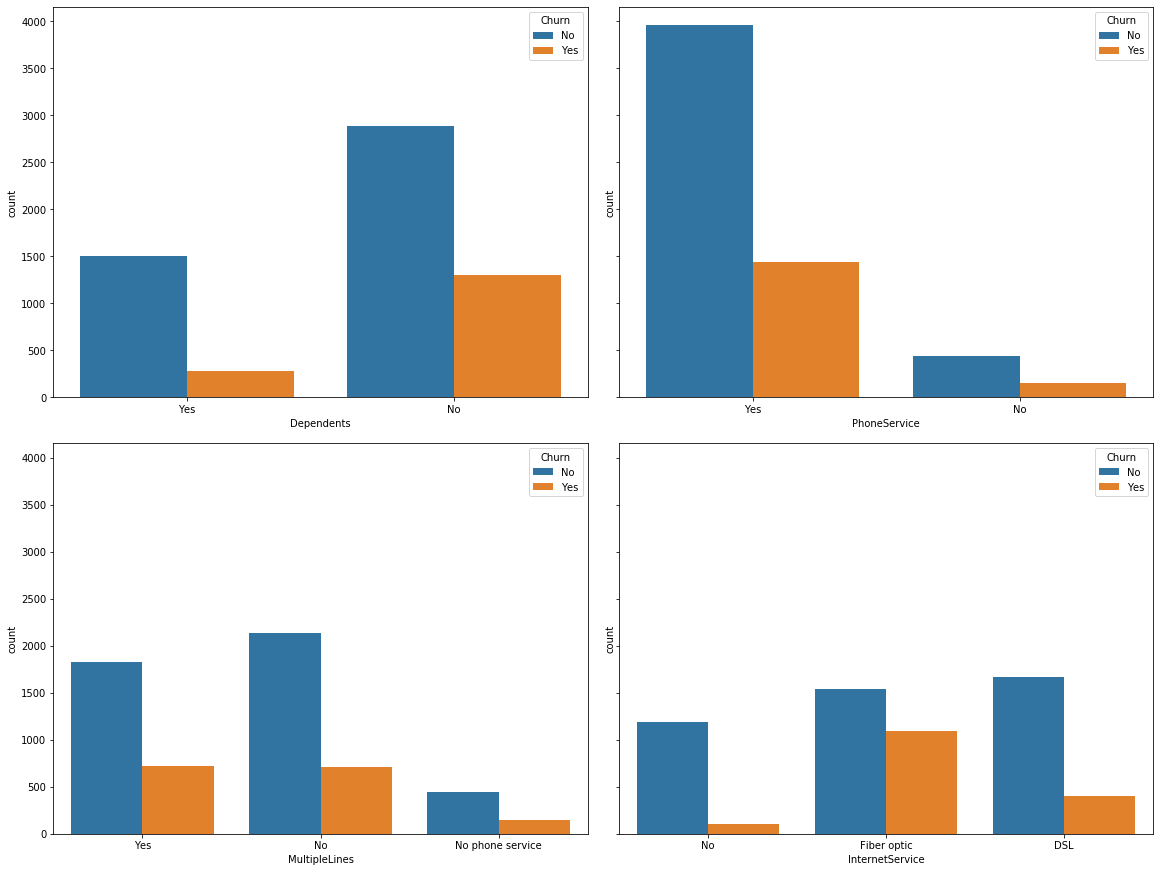

In [32]:
graphs = ['Dependents', 'PhoneService', 
          'MultipleLines', 'InternetService', ]

fig, ax = plt.subplots(2, 2, 
                       figsize=(16, 12), 
                       sharey=True,
                       constrained_layout=True,
                      )

for i, column in enumerate(graphs):
    sns.countplot(x=column, hue='Churn',  data=telecom_users, ax=ax[i//2, i%2])

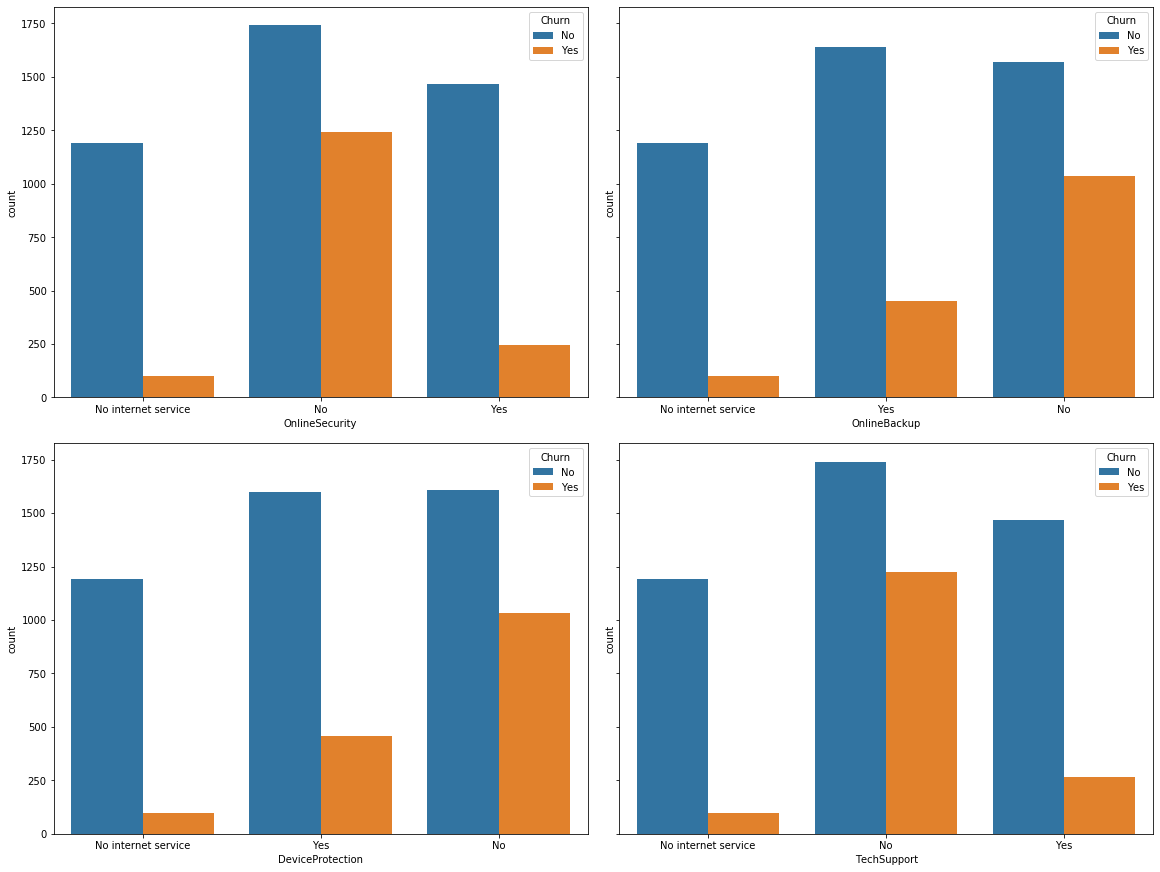

In [35]:
graphs = ['OnlineSecurity', 'OnlineBackup',
         'DeviceProtection', 'TechSupport', ]

fig, ax = plt.subplots(2, 2, figsize=(16, 12), sharey=True, constrained_layout=True)

for i, column in enumerate(graphs):
    sns.countplot(x=column, hue='Churn',  data=telecom_users, ax=ax[i//2, i%2])

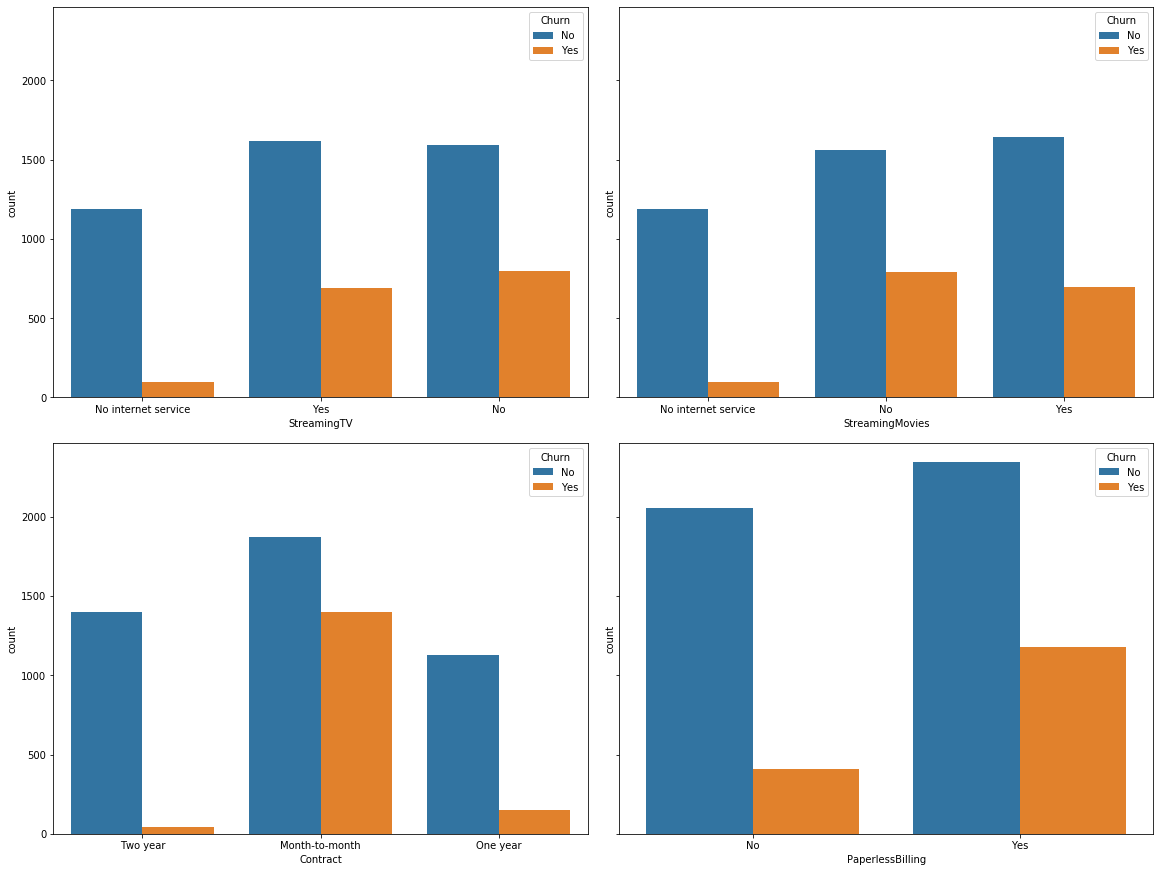

In [36]:
graphs = ['StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling'
         ]

fig, ax = plt.subplots(2, 2, figsize=(16, 12), sharey=True, constrained_layout=True)

for i, column in enumerate(graphs):
    #sns.histplot(x=telecom_users[column], ax=ax[i//3, i%3], kde=True)
    sns.countplot(x=column, hue='Churn',  data=telecom_users, ax=ax[i//2, i%2])

# 3. Построение моделей для прогнозирования оттока

In [ ]:
### YOUR CODE HERE ###




# 4. Сравнение качества моделей 

In [ ]:
### YOUR CODE HERE ###


